In [1]:
from IDMInterface import IDMSimulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from multiprocessing import Pool, Process, Value, Array

In [2]:
def max_ave_velocity(cars, length=1500, lanes=3, EU=False):
    steps = 800*30
    fn, df = IDMSimulation(road_length=length,
                          cars=cars,
                          lanes=3,
                          step_width=1/30,                
                          steps=steps,
                          EU=EU)
    
    t = df['t']
    velocities = np.zeros(shape=(steps, cars))
    for car_index in range(0,cars):
        for step in range(0, steps):
            velocities[step, car_index] = df['v' + str(car_index)][step]
    average_velocity = np.mean(velocities, axis=1)
    return average_velocity.max()

In [8]:
#car_num = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]# a bit long for testing
car_num = [10,20,30,40,50,60,70,80,90,100]

processes = l = [None] * len(car_num)
average_max_velocity = np.array(car_num)

average_max_velocity = Array('d', range(len(car_num)))

def calculate_for_index(index, car_num, target):
    target[i] = max_ave_velocity(car_num[i], EU=True)

for i in range(0, len(car_num)):
    p = Process(target=calculate_for_index, args=(i, car_num, average_max_velocity))
    p.start()
    processes[i] = p
    
for i in range(len(processes)):
    processes[i].join()
    
average_max_velocity_EU = np.array(average_max_velocity)


microscopicIDM --road-length 1500 --cars 10 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_10_3_0.03333333333333333_24000_EU.csv --EU microscopicIDM --road-length 1500 --cars 20 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_20_3_0.03333333333333333_24000_EU.csv --EU 

microscopicIDM --road-length 1500 --cars 30 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_30_3_0.03333333333333333_24000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 40 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_40_3_0.03333333333333333_24000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 50 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_50_3_0.03333333333333333_24000_EU.csv --EU microscopicIDM --road-length 1500 --cars 60 --lanes 3 --step-width 0.033333333333

In [9]:
processes = l = [None] * len(car_num)
average_max_velocity = np.array(car_num)

average_max_velocity = Array('d', range(len(car_num)))

def calculate_for_index(index, car_num, target):
    target[i] = max_ave_velocity(car_num[i], EU=False)

for i in range(0, len(car_num)):
    p = Process(target=calculate_for_index, args=(i, car_num, average_max_velocity))
    p.start()
    processes[i] = p
    
for i in range(len(processes)):
    processes[i].join()
    
average_max_velocity_US = np.array(average_max_velocity)

microscopicIDM --road-length 1500 --cars 20 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_20_3_0.03333333333333333_24000.csvmicroscopicIDM --road-length 1500 --cars 30 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_30_3_0.03333333333333333_24000.csvmicroscopicIDM --road-length 1500 --cars 10 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_10_3_0.03333333333333333_24000.csv


microscopicIDM --road-length 1500 --cars 40 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_40_3_0.03333333333333333_24000.csvmicroscopicIDM --road-length 1500 --cars 50 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv /tmp/IDM/1500_50_3_0.03333333333333333_24000.csv

microscopicIDM --road-length 1500 --cars 60 --lanes 3 --step-width 0.03333333333333333 --integration-steps 24000 --output-csv

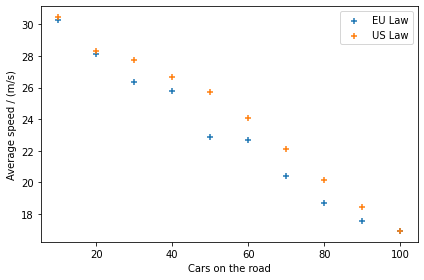

In [10]:
plt.scatter(car_num, average_max_velocity_EU, label='EU Law',
           marker='+')
plt.scatter(car_num, average_max_velocity_US, label='US Law',
           marker='+')

plt.xlabel('Cars on the road')
plt.ylabel('Average speed / (m/s)')
plt.legend()
plt.tight_layout()

plt.savefig('build/ave_speed_comparison.pdf')

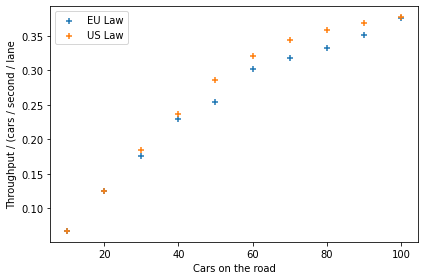

In [11]:
plt.scatter(car_num, car_num * average_max_velocity_EU / 4500, label='EU Law',
           marker='+')
plt.scatter(car_num, car_num * average_max_velocity_US / 4500, label='US Law',
           marker='+')

plt.xlabel('Cars on the road')
plt.ylabel('Throughput / (cars / second / lane')
plt.legend()
plt.tight_layout()

plt.savefig('build/ave_thoughput_comparison.pdf')

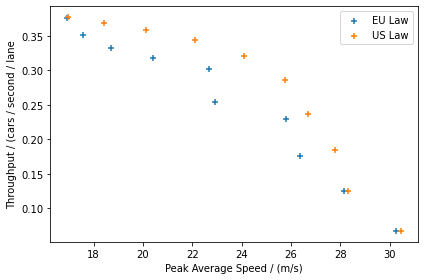

In [12]:
plt.scatter(average_max_velocity_EU, car_num * average_max_velocity_EU / 4500, label='EU Law',
           marker='+')
plt.scatter(average_max_velocity_US, car_num * average_max_velocity_US / 4500, label='US Law',
           marker='+')

plt.xlabel('Peak Average Speed / (m/s)')
plt.ylabel('Throughput / (cars / second / lane')
plt.legend()
plt.tight_layout()

plt.savefig('build/ave_thoughput_comparison.pdf')

## Satisfaction plot

In [13]:
def max_ave_satisfaction(cars, length=1500, lanes=3, EU=False):
    steps = 30000
    fn, df = IDMSimulation(road_length=length,
                          cars=cars,
                          lanes=3,
                          step_width=1/30,                
                          steps=steps,
                          EU=EU)
    
    t = df['t']
    satisfaction = df['average_satisfaction']
    recent_satisfaction = satisfaction[-1000:]
    return np.average(recent_satisfaction)

In [14]:
processes = l = [None] * len(car_num)
average_max_velocity = np.array(car_num)

average_max_velocity = Array('d', range(len(car_num)))

def calculate_for_index(index, car_num, target):
    target[i] = max_ave_satisfaction(car_num[i], EU=True)

for i in range(0, len(car_num)):
    p = Process(target=calculate_for_index, args=(i, car_num, average_max_velocity))
    p.start()
    processes[i] = p
    
for i in range(len(processes)):
    processes[i].join()
    
average_satisfaction_EU = np.array(average_max_velocity)

microscopicIDM --road-length 1500 --cars 10 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_10_3_0.03333333333333333_30000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 20 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_20_3_0.03333333333333333_30000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 30 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_30_3_0.03333333333333333_30000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 40 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_40_3_0.03333333333333333_30000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 50 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_50_3_0.03333333333333333_30000_EU.csv --EU 
microscopicIDM --road-length 1500 --cars 60 --lanes 3 --step-width 0.03333333333

In [15]:
#car_num = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]# a bit long for testing
car_num = [10,20,30,40,50,60,70,80,90,100]

processes = l = [None] * len(car_num)
average_max_velocity = np.array(car_num)

average_max_velocity = Array('d', range(len(car_num)))

def calculate_for_index(index, car_num, target):
    target[i] = max_ave_satisfaction(car_num[i], EU=False)

for i in range(0, len(car_num)):
    p = Process(target=calculate_for_index, args=(i, car_num, average_max_velocity))
    p.start()
    processes[i] = p
    
for i in range(len(processes)):
    processes[i].join()
    
average_satisfaction_US = np.array(average_max_velocity)

microscopicIDM --road-length 1500 --cars 10 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_10_3_0.03333333333333333_30000.csvmicroscopicIDM --road-length 1500 --cars 20 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_20_3_0.03333333333333333_30000.csv

microscopicIDM --road-length 1500 --cars 30 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_30_3_0.03333333333333333_30000.csv
microscopicIDM --road-length 1500 --cars 40 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_40_3_0.03333333333333333_30000.csv
microscopicIDM --road-length 1500 --cars 50 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv /tmp/IDM/1500_50_3_0.03333333333333333_30000.csv
microscopicIDM --road-length 1500 --cars 60 --lanes 3 --step-width 0.03333333333333333 --integration-steps 30000 --output-csv

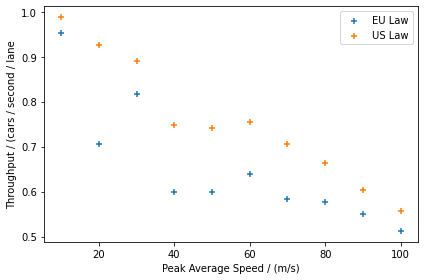

In [16]:
plt.scatter(car_num, average_satisfaction_EU, label='EU Law',
           marker='+')
plt.scatter(car_num, average_satisfaction_US, label='US Law',
           marker='+')

plt.xlabel('Peak Average Speed / (m/s)')
plt.ylabel('Throughput / (cars / second / lane')
plt.legend()
plt.tight_layout()

plt.savefig('build/ave_thoughput_comparison.pdf')